In [4]:
import numpy as np
import pandas as pd

from src.kMeans import KMeans as ownK
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn import metrics

In [5]:
data = np.array([[1, 1], [1, 2], [2, 2], [1.5, 1], [2.1, 1.5], [1.4, 2.2],
                 [5, 1], [5, 2], [6, 2], [5.75, 0.5], [5.5, 1.6], [5.1, 1.9],
                 [4, 5], [4, 6], [3, 5], [3.25, 4.8], [3.5, 5.4], [3.3, 5.9],
                 [3.5, 3]
                 ])
k = 3

39.80916714875227


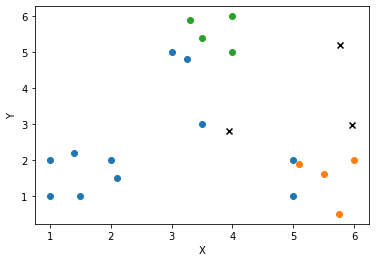

Mean:  [2.61363636 2.31818182]
Mean:  [5.5875 1.5   ]
Mean:  [3.7   5.575]
17.168539701967532


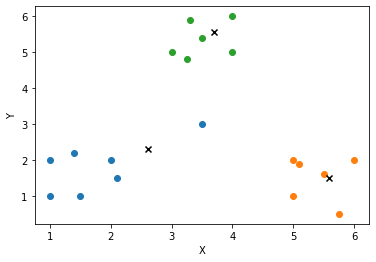

Mean:  [1.78571429 1.81428571]
Mean:  [5.39166667 1.5       ]
Mean:  [3.50833333 5.35      ]
13.20441448900999


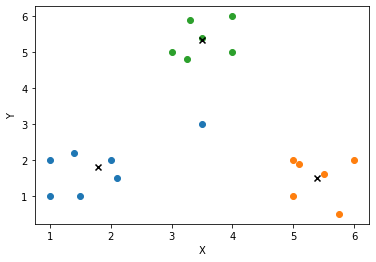

Mean:  [1.78571429 1.81428571]
Mean:  [5.39166667 1.5       ]
Mean:  [3.50833333 5.35      ]
13.20441448900999


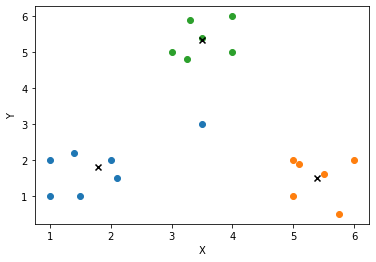

Finished after 3 iterations!


In [6]:
# own KMeans:

solver = ownK(verbose=True)
solver.find_clusters(3, data)

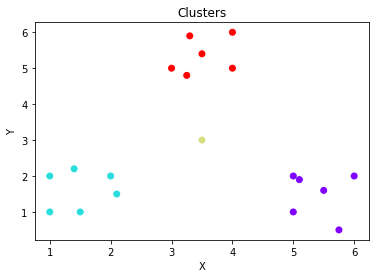

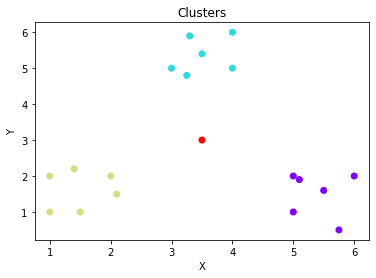

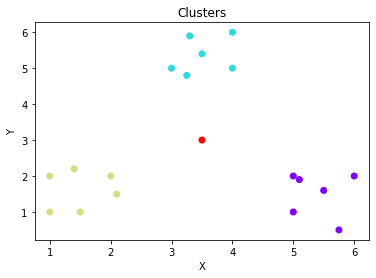

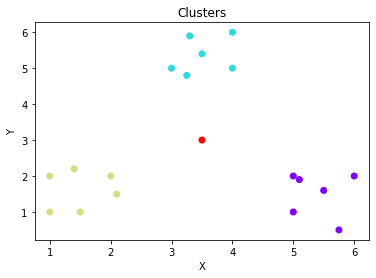

In [12]:
# Agglomerative with all linkage methods

data_pd = pd.DataFrame(data, columns=['X', 'Y'])
linkages = ['single', 'average', 'complete', 'ward']
for linkage in linkages:
    hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage =linkage)
    plt.scatter(data_pd['X'], data_pd['Y'], c = hc.fit_predict(data), cmap ='rainbow')
    plt.title("Clusters")
    plt.ylabel("Y")
    plt.xlabel("X")
    plt.show()

In [13]:
# k means as per library, get distortions to plot elbow
distortions = []
for k in range(1, data.shape[0]):
    # Building and fitting the model
    meanModel = KMeans(n_clusters=k).fit(data)
    meanModel.fit(data)

    distortions.append(sum(np.min(cdist(data, meanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / data.shape[0])

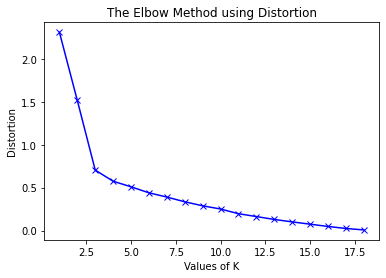

In [9]:
K = range(1, data.shape[0])

# plot distortions

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()